In [1]:
from ORBIT.phases.design import ElectricalDesign
from ORBIT import ParametricManager, ProjectManager
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
base_config = {
    'export_cable_install_vessel': 'example_cable_lay_vessel',
    'site': {
        'distance': 100, 
        'depth': 20, 
        'distance_to_landfall': 60
    },
    'plant': {
        'turbine_rating': 10,
#          'num_turbines': 50, 
#          'capacity': 500
    },
    'turbine': {'turbine_rating': 10},
    'oss_install_vessel': 'example_heavy_lift_vessel',
    'feeder': 'future_feeder',
    'export_system_design': {
        'cables': 'XLPE_500mm_220kV',
    }
    
}

## Low Cap

In [16]:
parameters = {
#     'export_system_design.cables': ['XLPE_1000m_220kV', 'XLPE_1200m_300kV_DC'],
#     'site.distance_to_landfall': np.arange(15,315,15),
#     'plant.num_turbines': np.arange(50,250,50), 
    'plant.capacity': np.arange(100,2100,100)
}

In [17]:
results = {
    'cable_cost': lambda run: run.total_cable_cost,
    'oss_cost': lambda run: run.substation_cost
}

In [18]:
parametric_low = ParametricManager(base_config, parameters, results, module = ElectricalDesign, product=True)
parametric_low.run()
parametric_low.results
# parametric.set_option("display.max_rows", None, "display.max_columns", None)
# parametric.preview()

,plant.capacity,cable_cost,oss_cost
0,100,41908300.0,3.894692e+07
1,200,41908300.0,4.620032e+07
2,300,83816600.0,6.972274e+07
3,400,83816600.0,7.697614e+07
4,500,125724900.0,1.004986e+08
5,600,125724900.0,1.077520e+08
6,700,125724900.0,1.150054e+08
7,800,167633200.0,1.385278e+08
8,900,167633200.0,1.612057e+08
9,1000,209541500.0,1.847281e+08


In [19]:
model_low = parametric_low.create_model(["plant.capacity"],'oss_cost')

In [20]:
# model.perc_diff

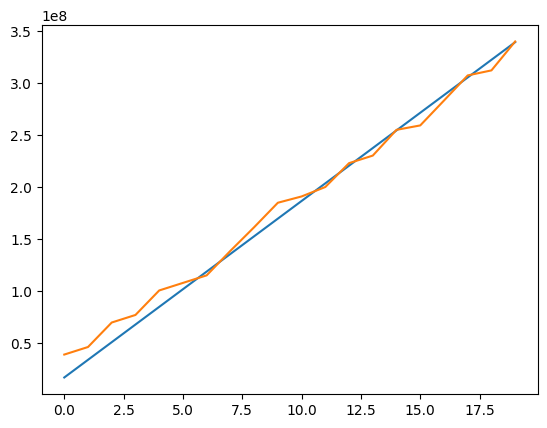

In [21]:
plt.plot(model_low.predict(parameters))
plt.plot(parametric_low.results.oss_cost)
plt.show()

## Med Cap

In [9]:
parameters = {
#     'export_system_design.cables': ['XLPE_1000m_220kV', 'XLPE_1200m_300kV_DC'],
#     'site.distance_to_landfall': np.arange(15,315,15),
#     'plant.num_turbines': np.arange(50,250,50), 
    'plant.capacity': np.arange(900,1700,100)
}

In [10]:
results = {
    'cable_cost': lambda run: run.total_cable_cost,
    'oss_cost': lambda run: run.substation_cost,
}

In [11]:
parametric_med = ParametricManager(base_config, parameters, results, module = ElectricalDesign, product=True)
parametric_med.run()
# parametric.results
# parametric.set_option("display.max_rows", None, "display.max_columns", None)
# parametric.preview()

In [12]:
model_med = parametric_med.create_model(["plant.capacity"],'oss_cost')

In [13]:
# model1.predict(parameters)

In [14]:
# model1.perc_diff

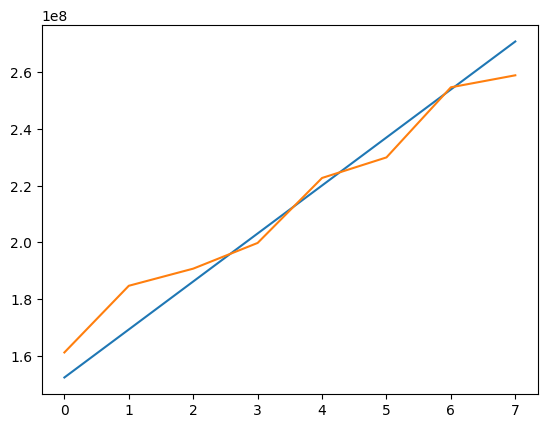

In [15]:
plt.plot(model_med.predict(parameters))
plt.plot(parametric_med.results.oss_cost)
plt.show()